<a href="https://colab.research.google.com/github/iamwendellbalagot/google-colab/blob/master/Sieve_Data_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [17]:
cnx = sqlite3.connect('server.db')

df = pd.read_sql_query("SELECT * FROM t1dec12", cnx)

In [18]:
df.tail(20)

,S1,S2,S3,S4,S5,S6,S7,Sample_Weight,Time
84,3.00,0.00,10.73,3.90,4.00,1.69,1.74,25.0,3.0
85,1.00,0.00,6.80,3.92,4.00,1.80,1.39,25.0,3.0
86,1.00,0.00,10.61,4.05,4.00,1.92,1.38,25.0,3.0
87,0.00,0.00,10.68,4.04,3.00,1.75,0.88,25.0,3.0
88,0.00,0.00,10.43,4.29,4.00,1.77,2.03,25.0,3.0
89,3.00,0.00,10.48,4.19,4.00,1.73,1.08,25.0,3.0
90,1.00,0.00,10.39,4.22,4.00,1.80,1.96,25.0,3.0
91,0.00,0.00,10.41,4.33,5.00,1.77,1.14,25.0,3.0
92,1.00,0.00,10.47,4.19,4.00,1.93,0.83,25.0,3.0
93,1.00,0.00,10.42,4.13,3.00,1.91,0.83,25.0,3.0


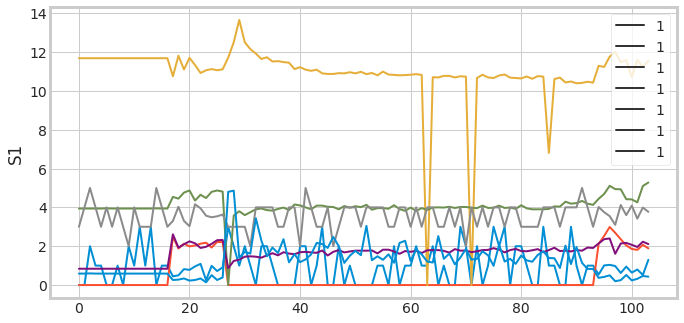

In [24]:
plt.figure(figsize=(10,5))

for col in df.columns:
  if col != 'Time' and col != 'Sample_Weight':
    sns.lineplot(np.arange(len(df)), df[col], size=1, legend=[df.columns])

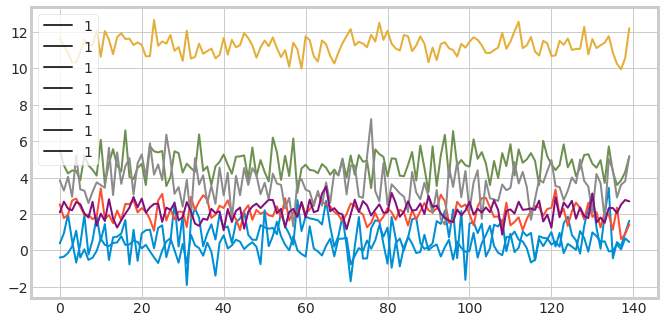

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(np.arange(140),np.random.normal(0.93, 1, 140), size=1)
sns.lineplot(np.arange(140),np.random.normal(2.1, 0.5, 140), size=1)
sns.lineplot(np.arange(140),np.random.normal(11.24, 0.5, 140), size=1)
sns.lineplot(np.arange(140),np.random.normal(4.66, 0.8, 140), size=1)
sns.lineplot(np.arange(140),np.random.normal(3.58, 1, 140), size=1)
sns.lineplot(np.arange(140),np.random.normal(2.21, 0.5, 140), size=1)
sns.lineplot(np.arange(140),np.random.normal(0.32, 0.5, 140), size=1)


In [193]:
def generateData(num=10, table='abcd', sampleWeight=25, timeInp=5):
  query = '''CREATE TABLE IF NOT EXISTS {0} (
										S1 REAL,
										S2 REAL,
										S3 REAL,
										S4 REAL,
										S5 REAL,
										S6 REAL,
										S7 REAL,
										Sample_Weight REAL,
										Time REAL
									);'''.format(table)
  cnx = sqlite3.connect('server.db')
  c = cnx.cursor()
  c.execute(query)

  for i in range(num):
    sen1 = np.random.normal(0.93, 1, 1)[0]
    sen2 = np.random.normal(2.1, 0.2, 1)[0]
    sen3 = np.random.normal(11.24, 0.2, 1)[0]
    sen4 = np.random.normal(4.66, 0.2, 1)[0]
    sen5 = np.random.normal(3.58, 0.6, 1)[0]
    sen6 = np.random.normal(2.21, 0.1, 1)[0]
    sen7 = np.random.normal(0.32, 0.2, 1)[0]

    data = [sen1, sen2, sen3, sen4, sen5, sen6, sen7, sampleWeight, timeInp]
    c.execute('INSERT INTO '+ table +' VALUES(?,?,?,?,?,?,?,?,?);', tuple(data));
    cnx.commit()
  cnx.close()
def generateRes(num=10, table='abcd', sampleWeight=25, timeInp=5):
  cnx = sqlite3.connect('server.db')
  c = cnx.cursor()

  for i in range(20):
    sen1 = np.random.normal(0.8, 0.05, 1)[0]
    sen2 = np.random.normal(2, 0.05, 1)[0]
    sen3 = np.random.normal(11.24, 0.05, 1)[0]
    sen4 = np.random.normal(4.46, 0.05, 1)[0]
    sen5 = np.random.normal(3.38, 0.05, 1)[0]
    sen6 = np.random.normal(2.21, 0.05, 1)[0]
    sen7 = np.random.normal(0.32, 0.05, 1)[0]

    data = [sen1, sen2, sen3, sen4, sen5, sen6, sen7, sampleWeight, timeInp]
    c.execute('INSERT INTO '+ table +' VALUES(?,?,?,?,?,?,?,?,?);', tuple(data));
    cnx.commit()
  cnx.close()

In [73]:
generateData(140, 'wendell3', 25, 5)
generateRes(140, 'wendell3', 25, 5)

In [74]:
cnx = sqlite3.connect('server.db')
samp_data = pd.read_sql_query("SELECT * FROM wendell3", cnx)
samp_data.head()

,S1,S2,S3,S4,S5,S6,S7,Sample_Weight,Time
0,1.076107,2.308722,10.910238,5.589661,2.662983,2.498844,1.282967,25.0,5.0
1,1.139738,1.199972,10.868804,4.950744,4.282040,1.432050,0.399144,25.0,5.0
2,0.447433,2.173486,12.118565,3.602142,2.888681,1.908668,0.285733,25.0,5.0
3,0.256788,2.181305,10.901938,6.018828,4.773119,2.786849,0.663439,25.0,5.0
4,0.845806,1.449893,11.875595,4.157414,3.440438,2.745711,-0.051171,25.0,5.0


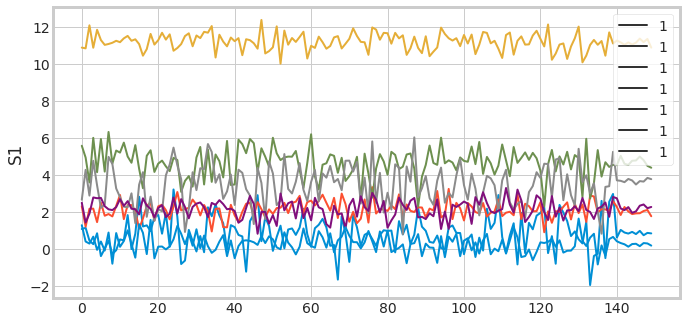

In [75]:
plt.figure(figsize=(10,5))

for col in samp_data.columns:
  if col != 'Time' and col != 'Sample_Weight':
    sns.lineplot(np.arange(len(samp_data)), samp_data[col], size=1)

In [70]:
def generateXL(table='test'):
	conn = sqlite3.connect('server.db')
	df = pd.read_sql('SELECT * FROM {}'.format(table), con=conn)
	data = pd.DataFrame(columns = ['Coarse Sieve', 'Weight Retained', 'Commulative WR %', 'Passing %'])
	sieve_sizes = ['3 in' , '2.5 in', '1.5 in', '1 in', '0.75 in', '0.5 in', 'PAN']
	data['Coarse Sieve'] = sieve_sizes
	weight_retained = [df['S1'].iloc[-1], df['S2'].iloc[-1], df['S3'].iloc[-1], df['S4'].iloc[-1],
		df['S5'].iloc[-1], df['S6'].iloc[-1], df['S7'].iloc[-1]]
	data['Weight Retained'] = weight_retained
	print('Weight Retained: ',data['Weight Retained'].sum())
	if data['Weight Retained'].sum() > df['Sample_Weight'].iloc[-1]:
		err = (data['Weight Retained'].sum() - df['Sample_Weight'].iloc[-1]) / 5
		weight_retained = [df['S1'].iloc[-1], df['S2'].iloc[-1]-err, df['S3'].iloc[-1]-err, df['S4'].iloc[-1]-err,
			df['S5'].iloc[-1]-err, df['S6'].iloc[-1]-err, df['S7'].iloc[-1]]
		data['Weight Retained'] = weight_retained
  else:
    coeff = 25 - data['Weight Retained'].sum()
    if coeff > 0.75:
      
	data['Weight Retained'] = (data['Weight Retained'] / df['Sample_Weight'].iloc[-1]) * 100
	data['Commulative WR %'] = data['Weight Retained'].cumsum()
	data['Weight Retained Kg'] = weight_retained
	data['Passing %'] = 100 - data['Commulative WR %']
	return data

In [239]:
generateData(130, 't2dec12', 25,5)
generateRes(10, 't2dec12', 25, 5)
cnx = sqlite3.connect('server.db')
samp_data = pd.read_sql_query("SELECT * FROM t2dec12", cnx)
gen_samp = generateXL('t2dec12')
gen_samp

Weight Retained:  24.461876525789243


,Coarse Sieve,Weight Retained,Commulative WR %,Passing %,Weight Retained Kg
0,3 in,3.203972,3.203972,96.796028,0.800993
1,2.5 in,8.175936,11.379907,88.620093,2.043984
2,1.5 in,45.168826,56.548734,43.451266,11.292207
3,1 in,17.661263,74.209997,25.790003,4.415316
4,0.75 in,13.605096,87.815093,12.184907,3.401274
5,0.5 in,8.842282,96.657374,3.342626,2.210570
6,PAN,1.190132,97.847506,2.152494,0.297533


In [238]:
cnx = sqlite3.connect('server.db')

#Creating a cursor object using the cursor() method
c = cnx.cursor()

#Doping EMPLOYEE table if already exists
c.execute("DROP TABLE t2dec12")
print("Table dropped... ")

#Commit your changes in the database
cnx.commit()

#Closing the connection
cnx.close()

Table dropped... 


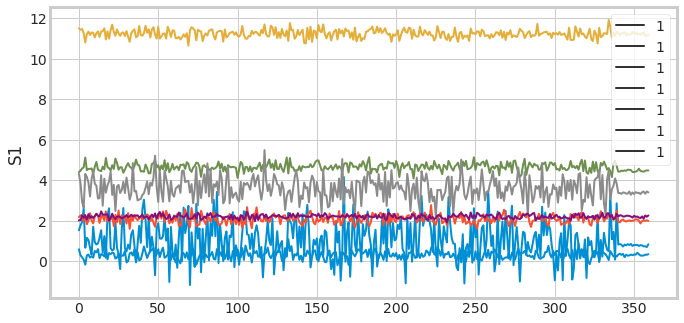

In [244]:
plt.figure(figsize=(10,5))
cnx = sqlite3.connect('server.db')
samp_data = pd.read_sql_query("SELECT * FROM t5dec12", cnx)

for col in samp_data.columns:
  if col != 'Time' and col != 'Sample_Weight':
    sns.lineplot(np.arange(len(samp_data)), samp_data[col], size=1)

In [245]:
samp_data.Time

0      12.0
1      12.0
2      12.0
3      12.0
4      12.0
       ... 
355    12.0
356    12.0
357    12.0
358    12.0
359    12.0
Name: Time, Length: 360, dtype: float64